In [1]:
import numpy as np, pandas as pd

In [2]:
# A linear regression model is a model where the target feature is a linear function of the input feature(s) 
# there are two ways to train a linear regression model :

#1) using a direct "closed-form" that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimize some cost function over the training set)

#2) using an iterative optimization approach Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set which will eventually  converge to the same set of parameters in the first method

# Linear Regression - The normal equation

In [3]:
# training a model means finding the model's parameter so that the model best fit the training dataset
# we need a measure of how well or poorly the model fits the training data

In [4]:
import numpy as np
import random

import matplotlib.pyplot as plt

error_term = np.random.randn(100,1) # note that we are creating 100 instances of error term

X = 2 * np.random.rand(100,1) # we are creating 100 instances in the independent variable X

y = 4 + 3*X + error_term
# y = a + bX + error term (Gaussian noise)

# np.random.rand < https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html > 
# 100 rows and 1 column, create an array of the given shape and populate it with random samples from a uniform distribution over [0,1]

# np.random.randn < https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html > 
# in summary, create a sample from the "standard-normal" distribution of mean 0 and variance 1 

Text(0.5, 1.0, 'Scatterplot between x1 and y')

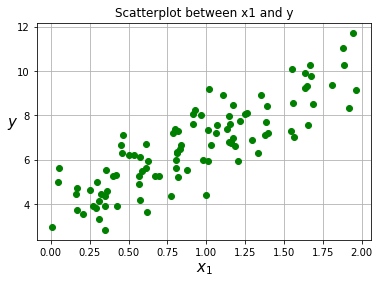

In [5]:
plt.plot(X, y, "go")
plt.xlabel("$x_1$", fontsize = 15)
plt.ylabel("$y$", rotation = 0, fontsize = 15)
plt.grid(True)
plt.title("Scatterplot between x1 and y")

In [6]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance, i.e. adding a colummn with a value of 1 for each instance
# np.ones creates array of one and np.ones create a 100 by 1 array of ones

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# X_b.T is a transpose of X_b
# inv() is a function from np.linalg can be used to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [7]:
theta_best
# y = a + bX + error term (Gaussian noise)
# a = 4.1 
# b = 2.8

array([[3.66257666],
       [3.20894905]])

In [8]:
# Making Prediction
X_new = np.array([[0], [2]]) # create two items
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.66257666],
       [10.08047477]])

[0, 2, 0, 15]

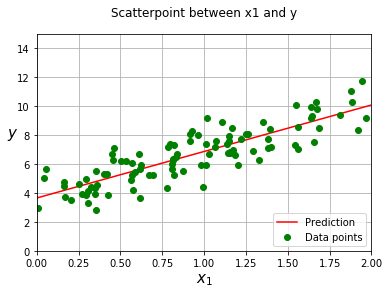

In [9]:
# Plotting Prediction
plt.plot(X_new, y_predict, "r-", label = "Prediction")
# the data point is (0,4.1) and (2, 9.8)

plt.plot(X, y, "go", label = "Data points")
plt.xlabel("$x_1$", fontsize = 15)
plt.ylabel("$y$", rotation = 0, fontsize = 15)
plt.legend(loc = "lower right")
plt.title("Scatterpoint between x1 and y", fontsize = 12, y = 1.05)
plt.grid(True)
plt.axis([0,2,0,15])

# Linear Regression using Scikit-Learn

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # this train the linear regression model using the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
intercept = lin_reg.intercept_ # --> a
reg_coefficient = lin_reg.coef_  # --> b
# y = a + bX + error term (Gaussian noise)

In [12]:
intercept

array([3.66257666])

In [13]:
reg_coefficient

array([[3.20894905]])

In [14]:
lin_reg.predict(X_new) # this is prediction based on new data points

array([[ 3.66257666],
       [10.08047477]])

# Linear Regression using scipy.linalg.lstsq() function

In [15]:
# the LinearRegression class is based on scipy.linalg.lstsq() function which you can call directly
# y = a + bX + error term (Gaussian noise)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.66257666],
       [3.20894905]])

# Gradient Descent (GD)

In [16]:
# GD is a generic optimization algorithm for finding optimal solutions
# the general idea of GD is to tweak the model parameters iteratively to minimise some cost function
# GD measures the local gradient of the error function with regards to the parameter vector and it goes in the direction of descending gradient
# once gradient is 0, you reach the minimum

# IMPORTANT NOTES 
#1 the parameter vector need to be filled with random values (called the random initialization)
#2 you then improve it gradually, with baby step each time, each time attempting to decrease the cost function until algorithm converges to a minimum
#3 when using GD, all the features should have similar scale or else it will take much longer to converge to the optimal solution
##3a if the training set contain different features with different scale, features with the smaller values will require a large change in the parameter to affect the cost function, which explain why the cost curve for a training set with features with different scaling to be much elongated than the cost curve of a training set with features with the same scaling

#3 an important parameter in GD is the size of the step, determined by the learning rate hyperparameter
#3a if the learning rate is too small, the algorithmn will go through many iteration to converge which will take a long time to converge to the minimum
#3b if the learning rate is too high, the error might jump around and may not converge to an optimal solution, i.e. reaching the minimum

#4 note that not all cost function looks like regular bowl-shaped curve
#4a depending on the shape of the curve and the area of the curve where the algorithmn starts at, the algorithmn may settle at the local minimum rather than the global minimum

#5 different cost function have different shape
#5a MSE cost function for a linear regression model happens to be a convex function which means there is no local minimum, only one global minimum
#5b MSE cost function is also a continous function with a slope that never change abruptly

# Batch Gradient Descent (BGD)

In [17]:
# to implement GD, you will compute the gradient of the cost function with regards to each model parameter
# in other words, you need to calculate the how much the cost function will change when you change the model parameter by a little bit. this is known as partial derivative

# the partial derivatives can be computed at one go for all the model parameters, instead of individually for each model parameters
# refer to page 121 and 122 for the computation of the gradient vector 

# the gradient vector calculation involve calculation over the full training set X, at each Batch Gradient Descent step
# as a result, it is very slow on very large training set


In [18]:
# the implementation of batch gradient descent

learning_rate = 0.1 #learning rate / # to find a good learning rate , you can use grid search
n_iteration = 1000
m = 100 # number of instances 

theta = np.random.randn(2,1) #random initialization # note that we have two parameters

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

In [19]:
theta

array([[3.66257666],
       [3.20894905]])

In [20]:
# prediction 
X_new_b.dot(theta)

array([[ 3.66257666],
       [10.08047477]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

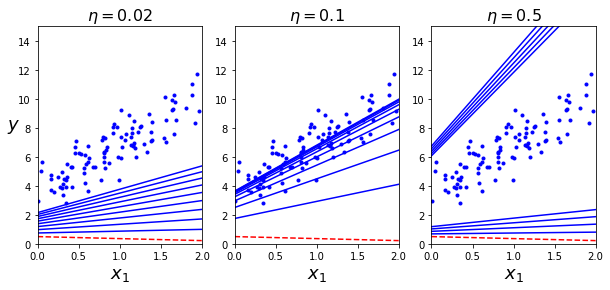

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent (SGD)

In [23]:
# SGD is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.

# the main problem with BGD is that it uses the full training set to compute the gradient at every step which makes it very slow when to train very large dataset
# instead, SGD picks a random instance in the training set at every step and compute the gradient based only on that single instance
# since the instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all

# SGD algorithm can be implemented as an out-of-core algorithm
# SGD algorithm can be trained on very large training dataset since only one instance needs to be in memory for each iteration

# However, due to the stochastic nature of the algorithm, it is less regular than BGD
# the cost function may fluctuate up and down and only decreases over time
# however, it will end up very close to the minimum however even when it gets there, it will continue to bounce around, never settling down at the minimum

# an irregular cost function can help the algorithm to jump out of the local minimum and to reach the global minimum
# therefore, SGD have a better chance of reaching the global minimum than BGD
# randomness is a good to escape the local minimum and to reach the global minimum

# each round in the iteration is called an epoch
# while BGD goes through 1000 iteration, SGD goes through only 50 iteration and reaches a pretty good solution

# when using SGD, the training instances must be independent and identically distributed (IID) to ensure that the parameters are pulled towards the global optimum on average
# if the instances are not shuffled, and instead sorted by label, SGD will start by optimizing for one label and for next and so on. and it will not settle to the global optimum

In [24]:
n_epochs = 50 # number of iterations
t0 = 5 # learning schedule parameters
t1 = 50 # learning schedule parameters

m = len(X_b)
np.random.seed(42)

theta_path_sgd = []
theta = np.random.randn(2,1) #random initialization

def learning_schdule(t):
    return t0 / (t + t1)

Text(0.5, 1.0, 'Progression of the first 20 steps of the algorithm')

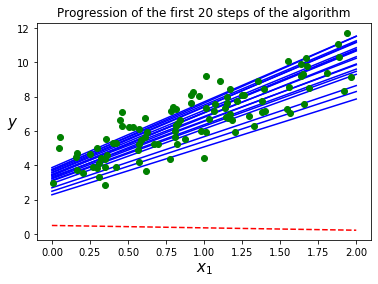

In [25]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20 :
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schdule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

plt.plot(X, y, "go")
plt.xlabel("$x_1$", fontsize = 15)
plt.ylabel("$y$", rotation = 0, fontsize = 15)
plt.title("Progression of the first 20 steps of the algorithm", fontsize = 12)

In [26]:
theta

array([[3.63352512],
       [3.16481454]])

In [27]:
# Linear Regression using Stochasic Gradient Descent

from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter= 1000, tol = 1e-3, penalty= None, eta0 =0.1) # by default, the cost function is the squared error

# max_iter --> number of iterations
# tol --> tolerance level
# the above codes means that the algo will run for a maximum of 1000 iterations or untill the loss drops by less than 0.001 during one epoch
# penalty --> refer to the regularization applied, if None means no regularization
# eta --> refer to learning schdule. 0.1 is the default learning schdule
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [28]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([3.62359838]), array([3.19568978]))

# Mini-batch Gradient Descent

In [29]:
# instead computing the gradient using the full training set or single instances, mini-batch gradient descent compute the gradients on small random sets of instances called mini-batches
# in each mini-batches, the number of instances is more than one and less than the the number of instance in the full training batch

# the algorithmn's process in the model's parameter space will be less erratic than the SGD especially with larger mini-batches
# hence, mini-batch GD will end up closer to the minimum than SGD
# note that stochastic and mini-batch GD will not settle at the minimum but instead bounce around the global minimum. this is assuming that we use a good learning schedule
# once the algorithm stops, the final parameter values will be good but will be sub-optimal
# the final parameter values will be near to the global minimum

# the benefit of stochastic and mini-batch GD is that it require a much lower number of iteration,i.e. faster, to reach the minimum than the batch GD 

# Polynominal Regression

In [30]:
# while a linear regression model is a model where the target feature is a linear function of the input features
# a polynominal regression model is a model where the target feature is a non-linear function of the input features 
## we can add new feature from the existing feature by adding power to the existing feature

Text(0, 0.5, '$y$')

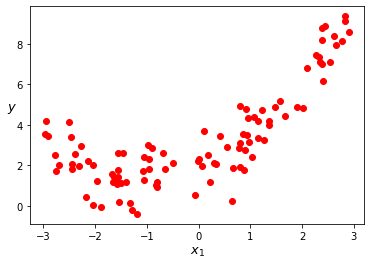

In [31]:
np.random.seed(42)

m = 100 # the number of instances
error_term = np.random.randn(m,1)
X = 6 * np.random.rand(m, 1) - 3 # there is only one feature in this dataset

y = 0.5 * X**2 + X + 2 + error_term

plt.plot(X, y, "ro")
plt.xlabel("$x_1$", fontsize = 13)
plt.ylabel("$y$", rotation = 0, fontsize = 13)
# from the below we know that a straight line will not fit the dataset

In [32]:
# we will now use the SL PolynominalFeatures class to transform our training data, adding square (second-degree polynominal) to each feature in the training dataset

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [33]:
X[0]

array([-0.49553398])

In [34]:
X_poly[0] # X_poly will contain the information from the original feature as well as the sqaured of the original feature

array([-0.49553398,  0.24555393])

In [35]:
# we then use linear regression to model this extended dataset

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89588973]), array([[1.06830471, 0.50199494]]))

In [36]:
# we now create some new instances 
X_new = np.linspace(-3,3,100).reshape(100,1)
# linspace create evenly-spaced intervels datapoints
# note that we are creating 100 new instances

# we now make predictions using the new instance
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

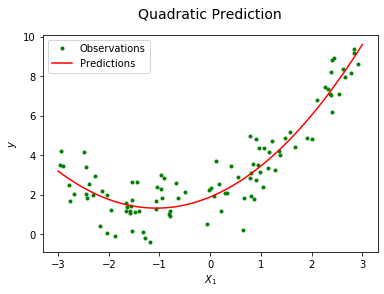

In [37]:
plt.plot(X, y, "g.", label = "Observations")
plt.plot(X_new, y_new, "r-", label = "Predictions")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.title("Quadratic Prediction", fontsize = 14, y = 1.05)
plt.legend(loc = "upper left")

# from the curve below, you can see that the curve is fitting the data rather nicely

# Learning Curve 

In [38]:
# if you perform a high-degree polynominal regression, chance are you will fit the data much better than a lower-degree model 
# however, there is a good chance that you will overfit the model as well where the model perform well on training dataset and will not generalize well to new instances

# we know that if the model performs well on the training dataset and badly on new instances, chances are we have overfitted the data
# and if the model perform poorly on both the training data and to new instances, chances are we have underfitted the data
# the above is one way to tell if the model is too simple or complex 

# an alternative method is by looking at the Learning Curve
# it plots the model's performance on the training set and the validation set, as a function of the size of the training set, or the size of the training iteration
# to generate this plot, we need to train the model several times on differnet subsets of the training dataset. these subsets also have different size, i.e it contain different number of instances

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y) :
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2) # to split the X, y into the training and test/val dataset
    train_errors, val_errors = [], [] # create a container for the error rate for the training and validation/test dataset
    
    for m in range(1, len(X_train)): 
        
        model.fit(X_train[:m], y_train[:m]) # fiting the specified model
        
        y_train_predict = model.predict(X_train[:m]) # predict the model using the train dataset
        y_val_predict = model.predict(X_val) # predict the model using the validation/test dataset
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # collect the error rate from the prediction from the training dataset
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # collect the error rate from the prediction from the valdation dataset
    
    plt.plot(np.sqrt(train_errors), "r-+", label = "train")
    plt.plot(np.sqrt(val_errors), "b-", label = "val")
    plt.xlabel("Training Set Size", fontsize = 12)
    plt.ylabel("RMSE", fontsize = 12)
    plt.title("Learning Curve", fontsize = 14, y = 1.05)
    plt.grid(True)
    plt.legend()

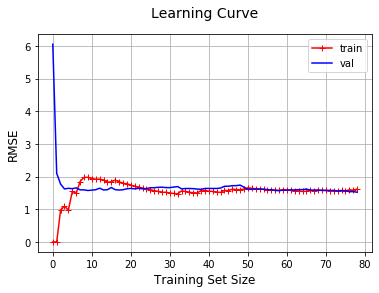

In [40]:
lin_reg = LinearRegression() 
plot_learning_curve(lin_reg, X, y) # we are plotting the Learning Curve of a linear regression on X and y. note that y = 0.5 * X**2 + X + 2 + error_term, i.e a quadratic model

# Performance on Training data
#1 when there is only one or two instances, the model can fit the data perfectly and hence it starts at 0 or near 0
#2 however as new instances are added to the training set, it become impossible to fit the model perfectly as the data is noisy and because the data is not linear in nature ultimately
#3 note that we are using a linear regression model 
#4 hence the error goes up when more instances are added to the training set, and eventually reaches a plateau where adding new instances will not increase or decrease the error rate

# Performance on Validation data
#1 when the model is trained on very few instances, it is incapable of generalizing well, hence the validation error is large
#2 as we increase the size of the training set by adding more instances into the dataset, the model's generalization ability improves and the validation error improves, i.e. decreases
#3 once again, we have a linear regression model, modelling data that is quadratic in nature
#4 therefore the validation error will keep decreasing untill it reaches a plateau

# Notes : 
#1 when the model is underfitting, adding more instances when the model's error rate has reached a plateau, will not help to further reduce the error rate
#1a for the above, the souce of the problem is that we are using a linear regression model to fit data that are quadratic in nature
#2 we need to use a more complex model or come up with better features

In [41]:
# now we look at the learning curve of a 10-th degree polynominal model on the same data
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("lin_reg", LinearRegression()),
    ])

[0, 80, 0, 3]

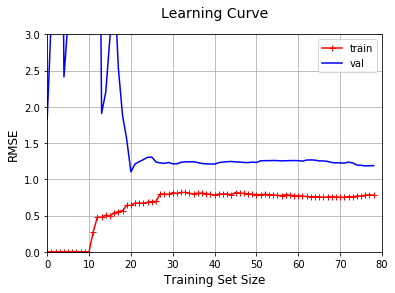

In [42]:
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0,80,0,3])

# Notes
#1 the error on the training data is much lower in the 10-degree polynominal regression than that in the linear regression 
#2 the "big" gap between the training and validation data imply that the model perform significantly better data using the training data than on the validation data
#2a this is the hallmark of an overfitting model where the model perform significantly better on the training data than on the validation data
#2c to improve an overfitted model, we can fit the model with more training data until the validation error reaches the training error

# Regularized Models

In [43]:
# one method to reduce overfitting is to constrain/regularize the model, i.e. a model with fewer degree of freedom
# a direct and simple method to constrain a polynominal model is to reduce the number of polynominal degree

# for a linear model, regularization is acheived by constraining the weight of the model

## Regularized Models - Ridge Regression

In [44]:
# Ridge regression is a regularized version of the linear regression where a regularization term is added to the cost function
# the regularization term has two purpose
#1 forces the algorithm to fit the data
#2 keeps the model weight as small as possible

# IMPORTANT NOTES
#1 note that the regularization term should only be added to the cost function during the training phase
#1a after the model is trained, we use the unregularized performance measure to evaluate the model's performance
#2 it is important to scale the data before performing ridge regression as it is sensitve to the scale of the input features
#2a this is true for most regularized model

# it is common to have difference performance measures during the training and testing phase (see page 135)

# we can either perform the RIDGE regression by either computing the raw form or through the SGD regression



In [45]:
np.random.seed(42)
m = 20
error_term = np.random.randn(m, 1) / 1.5
X = 3 * np.random.rand(m, 1)

y = 1 + 0.5 * X + error_term

X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [46]:
from sklearn.linear_model import Ridge, SGDRegressor

# RIDGE regression using SL
ridge_reg = Ridge(alpha= 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.63752212]])

In [47]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.864645]), array([[0.51525141]]))

In [48]:
# SGD regression with regularization using SL
sgd_regressor = SGDRegressor(penalty="l2", max_iter=1000, tol = 1e-3, random_state=42)
# specifying "l2" indicates you want SGD to add a regularization term to the cost function, equal to the half the square of the l2 norm of the weight vector. this is simply the ridge regression

sgd_regressor.fit(X, y.ravel())
sgd_regressor.predict([[1.5]])

array([1.55402335])

In [49]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([0.51334789]), array([0.69378364]))

## Regularized Models - LASSO Regression

In [50]:
# LASSO stand for Least Absolute Shrinkage and Selection Operator Regression
# similar to rige regression, it adds a regularization term to the cost function
# but it uses the l1 norm of the weight vectoir instead of the l2 norm

In [51]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.62796047])

In [52]:
lasso_reg.intercept_, lasso_reg.coef_

(array([0.98217375]), array([0.43052448]))

In [53]:
# We can use SGDRegressor(penalty = "l1") for the lasso regression
sgd_regressor_lasso = SGDRegressor(penalty="l1", max_iter=1000, tol = 1e-3, random_state=42)
sgd_regressor_lasso.fit(X, y.ravel())

sgd_regressor_lasso.intercept_, sgd_regressor_lasso.coef_

(array([0.51336264]), array([0.6937666]))

In [54]:
sgd_regressor_lasso.predict([[1.5]])

array([1.55401255])

In [55]:
from sklearn.linear_model import ElasticNet

reg_elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Early Stopping

In [56]:
# Early Stopping is a way of regularizing iterative learning algorithms where training is stopped as soon as the validation error reaches a minimum

# As epochs go by, the algorithm learns and the prediction error on the training and validation dataset decreases
# After a while, the validation error will reach a minimum and start to increase
# This indicate that the model has started to overfit the training data

# With BGD and mini0batch GD, the cost function may not be smooth and it may be hard to tell if the algorithm reached the minimum
# One solution is to stop only after the validation error is above the minimum for some time and we roll back the model parameter to the point where the validation error was at a minimum

In [57]:
from sklearn.model_selection import train_test_split

m = 100
error_term = np.random.randn(m,1)
X = 6 * np.random.randn(m,1) - 3 
y = 0.5*X**2 + X + error_term

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2) 

In [58]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_regressor = SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [59]:
minimum_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_regressor.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_regressor.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error :
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_regressor)

In [60]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

# Logistic Regression and Estimating Probabilities

In [61]:
# Logistic regression can be used to estimate the probabilities that an instance belong to a particular class
# if the estimated probability is greater than 50, the model predict that the instance beling to the positive class, otherwise, it predict that the instance belong to the negative class
# this is a binary classifier

# A logistic regression model compute the weighted sum of the input features and the bias term and output the logistic of the result
# the logistic of the result is a sigmoid function that outputs a number between 0 and 1


In [62]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [63]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
iris["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [66]:
# We now want to build a classifier to detect Iris Virginica

X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int) # return 1 and 0 where 1 if Iris virgincia else 0

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
# the above to create instances representing flowers with petal widths varying from 0 to 3 cm
y_proba = log_reg.predict_proba(X_new)
# to create the probabalities class 

decision_boundary = X_new[y_proba[:,1] > 0.5][0]

In [69]:
proba_for_negative_class = y_proba[:,0]
proba_for_positive_class = y_proba[:,1]

Text(0, 0.5, 'Probability')

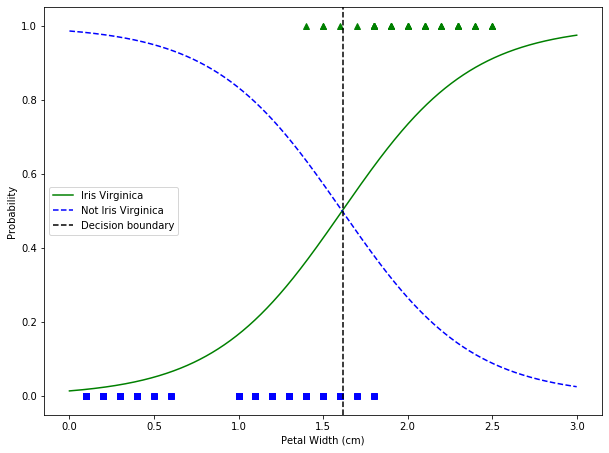

In [70]:
plt.figure(figsize=(10,7.5))

plt.plot(X[y==0], y[y==0],"bs") # this plots the petal width of non-Virginica flowers
plt.plot(X[y==1], y[y==1], "g^") # this plots the petal width of Virginica flowers

plt.plot(X_new, proba_for_positive_class, "g-", label = "Iris Virginica")
plt.plot(X_new, proba_for_negative_class, "b--", label = "Not Iris Virginica")

plt.axvline(decision_boundary,0,1, c="k", linestyle = "--", label="Decision boundary")

plt.legend(loc = "center left")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")

In [71]:
# the classifier is highly confident to assign a positive class when the petal lenght is more than 2cm 
# the classifier is similarly confident to assign a negative class when the petal lenght is less than 1cm 

# anything else in between, the classifier is unsure 

# there is a decision boundary at where the petal width is 1.6cm where both probabilities are equal to 50%

sample = np.array([[1.7], [1.5]])
log_reg.predict(sample)

array([1, 0])

In [72]:
# Logistic Regression with 2 features  (petal lenght and petal width)

In [73]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
X = iris["data"][:,[2,3]]
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C = 10**10, random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Softmax Regression

In [75]:
# Softmax regression is one where we generalize the logistic regression model to support multiple class

In [76]:
# Scikit logistic regression uses OVR by default when training on more than 2 classes
# but we can set the multi-class hyperparameter to switch it to Softmax Regression

X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
softmax_reg.predict([[5,2]])
# the above predicts a flower with petal that are 5cm long and 2cm wide
# the above predicts class 2 (iris virinica)

array([2])

In [86]:
print(iris.keys())
print(iris["target_names"])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
